<a href="https://colab.research.google.com/github/meghashyaam/PyTorch_Projects/blob/main/Rice_Classification(PyTorch).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install opendatasets --quiet
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mssmartypants/rice-type-classification")

Skipping, found downloaded files in ".\rice-type-classification" (use force=True to force download)


In [ ]:
import torch
import torch.nn as nn
from torch.optim import Adam
from torch.utils.data import Dataset,DataLoader
from torchsummary import summary

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [ ]:
data_df = pd.read_csv("./rice-type-classification/riceClassification.csv")
data_df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
data_df.dropna(inplace=True)
data_df.drop(['id'], axis=1, inplace=True)
print(data_df.shape)

(18185, 11)


In [ ]:
data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [ ]:
print(data_df['Class'].unique())

[1 0]


In [ ]:
print(data_df['Class'].value_counts())
# print(type(data_df['Class'].value_counts()))

Class
1    9985
0    8200
Name: count, dtype: int64


In [ ]:
original_df = data_df.copy()

for column in data_df:
    data_df[column] = data_df[column] / data_df[column].abs().max()

data_df.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,0.444368,0.503404,0.775435,0.744658,0.424873,0.666610,0.741661,0.537029,0.844997,0.368316,1.0
1,0.281293,0.407681,0.622653,0.750489,0.273892,0.530370,0.804230,0.409661,0.919215,0.371471,1.0
2,0.298531,0.416421,0.630442,0.756341,0.284520,0.546380,0.856278,0.412994,0.959862,0.374747,1.0
3,0.300979,0.420463,0.629049,0.764024,0.286791,0.548616,0.883772,0.414262,0.961818,0.379222,1.0
4,0.361704,0.464626,0.682901,0.775033,0.345385,0.601418,0.867808,0.452954,0.966836,0.386007,1.0


In [ ]:
X = np.array(data_df.iloc[:, :-1])
Y = np.array(data_df.iloc[:, -1])

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)

In [ ]:
X_test, X_val, Y_test, Y_val = train_test_split(X_test , Y_test, test_size=0.5)

In [ ]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(12729, 10)
(2728, 10)
(2728, 10)


In [ ]:
class dataset(Dataset):
    def __init__(self, X, Y):
        self.X = torch.tensor(X, dtype = torch.float32).to(device)
        self.Y = torch.tensor(Y, dtype = torch.float32).to(device)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, index):
        return self.X[index], self.Y[index]

In [ ]:
training_data = dataset(X_train, Y_train)
validation_data = dataset(X_val, Y_val)
testing_data = dataset(X_test, Y_test)

In [ ]:
training_dataloader = DataLoader(training_data, batch_size = 8, shuffle = True)
validation_dataloader = DataLoader(validation_data, batch_size = 8, shuffle = True)
testing_dataloader = DataLoader(testing_data, batch_size = 8, shuffle = True)

In [ ]:
for x,y in training_dataloader:
    print(x)
    print("========")
    print(y)
    break

tensor([[0.7040, 0.7681, 0.8067, 0.9112, 0.6773, 0.8391, 0.6758, 0.6673, 0.8671,
         0.5402],
        [0.6819, 0.8637, 0.6854, 0.9660, 0.6452, 0.8258, 0.6253, 0.6993, 0.7646,
         0.7149],
        [0.4318, 0.7446, 0.5089, 0.9841, 0.4150, 0.6571, 0.5117, 0.5892, 0.6821,
         0.8302],
        [0.5143, 0.8097, 0.5638, 0.9821, 0.4975, 0.7171, 0.5360, 0.6540, 0.6595,
         0.8148],
        [0.6179, 0.8616, 0.6298, 0.9767, 0.5884, 0.7861, 0.7935, 0.6952, 0.7011,
         0.7761],
        [0.9170, 0.8869, 0.8987, 0.9203, 0.8743, 0.9576, 0.6503, 0.7692, 0.8499,
         0.5599],
        [0.6329, 0.8646, 0.6446, 0.9743, 0.6037, 0.7956, 0.8930, 0.6919, 0.7250,
         0.7610],
        [0.6127, 0.8539, 0.6306, 0.9754, 0.5831, 0.7828, 0.6487, 0.6815, 0.7234,
         0.7682]], device='cuda:0')
tensor([0., 1., 1., 1., 1., 0., 1., 1.], device='cuda:0')


In [ ]:
HIDDEN_NEURONS = 10
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        self.input_layer = nn.Linear(X.shape[1], HIDDEN_NEURONS)
        self.linear = nn.Linear(HIDDEN_NEURONS, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.input_layer(x)
        x = self.linear(x)
        x = self.sigmoid(x)
        return x

model = MyModel().to(device)

In [ ]:
summary(model, (X.shape[1],))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 10]             110
            Linear-2                    [-1, 1]              11
           Sigmoid-3                    [-1, 1]               0
Total params: 121
Trainable params: 121
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


In [ ]:
criterion = nn.BCELoss()
optimizer = Adam(model.parameters(), lr = 1e-3)

In [ ]:
total_loss_train_plot = []
total_loss_val_plot = []
total_acc_train_plot = []
total_acc_val_plot = []

epochs = 10

for epoch in range(epochs):
    total_acc_train = 0
    total_loss_train = 0
    total_acc_val = 0
    total_loss_val = 0

    for data in training_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)
        batch_loss = criterion(prediction, labels)
        total_loss_train += batch_loss.item()

        batch_acc = (prediction.round() == labels).sum().item()
        total_acc_train += batch_acc

        batch_loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    with torch.no_grad():
        for data in validation_dataloader:
            inputs, labels = data

            prediction = model(inputs).squeeze(1)
            batch_loss = criterion(prediction, labels)
            total_loss_val += batch_loss.item()

            batch_acc = (prediction.round() == labels).sum().item()
            total_acc_val += batch_acc


    total_loss_train_plot.append(round(total_loss_train/1000, 4))
    total_loss_val_plot.append(round(total_loss_val/1000, 4))

    total_acc_train_plot.append(round(total_acc_train/training_data.__len__() * 100, 4))
    total_acc_val_plot.append(round(total_acc_val/validation_data.__len__() * 100, 4))

    print(f''' Epoch: {epoch+1} Train Loss: {round(total_loss_train/1000, 4)} Train Accuracy: {round(total_acc_train/training_data.__len__() * 100, 4)}
               Validation Loss: {round(total_loss_train/1000, 4)} Validation Accuracy: {round(total_acc_val/validation_data.__len__() * 100, 4)}''')
    print('='*30)


 Epoch: 1 Train Loss: 0.6319 Train Accuracy: 90.3449
               Validation Loss: 0.6319 Validation Accuracy: 98.0572
 Epoch: 2 Train Loss: 0.1389 Train Accuracy: 98.5152
               Validation Loss: 0.1389 Validation Accuracy: 98.3504
 Epoch: 3 Train Loss: 0.0864 Train Accuracy: 98.6252
               Validation Loss: 0.0864 Validation Accuracy: 98.3504
 Epoch: 4 Train Loss: 0.0734 Train Accuracy: 98.6566
               Validation Loss: 0.0734 Validation Accuracy: 98.4604
 Epoch: 5 Train Loss: 0.0694 Train Accuracy: 98.5623
               Validation Loss: 0.0694 Validation Accuracy: 98.4971
 Epoch: 6 Train Loss: 0.0671 Train Accuracy: 98.5623
               Validation Loss: 0.0671 Validation Accuracy: 98.3138
 Epoch: 7 Train Loss: 0.0661 Train Accuracy: 98.6409
               Validation Loss: 0.0661 Validation Accuracy: 98.3138
 Epoch: 8 Train Loss: 0.0666 Train Accuracy: 98.6645
               Validation Loss: 0.0666 Validation Accuracy: 98.4971
 Epoch: 9 Train Loss: 0.0657 Tra

In [ ]:
with torch.no_grad():
    total_loss_test = 0
    total_acc_test = 0
    for data in testing_dataloader:
        inputs, labels = data

        prediction = model(inputs).squeeze(1)
        batch_loss_test = criterion(prediction, labels)
        total_loss_test += batch_loss_test

        batch_acc_test = (prediction.round() == labels).sum().item()
        total_acc_test += batch_acc_test

    print(f"Accuracy: {round(total_acc_test/testing_data.__len__() * 100, 4)}")

Accuracy: 98.6804


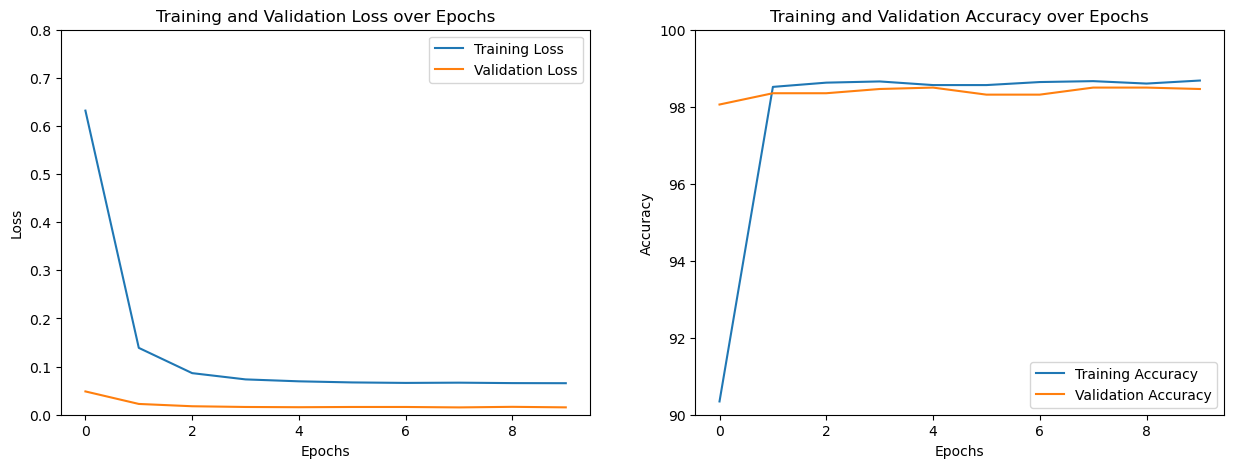

In [ ]:
fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 5))

axs[0].plot(total_loss_train_plot, label="Training Loss")
axs[0].plot(total_loss_val_plot, label="Validation Loss")
axs[0].set_title("Training and Validation Loss over Epochs")
axs[0].set_xlabel("Epochs")
axs[0].set_ylabel("Loss")
axs[0].set_ylim([0,0.8])
axs[0].legend()

axs[1].plot(total_acc_train_plot, label="Training Accuracy")
axs[1].plot(total_acc_val_plot, label="Validation Accuracy")
axs[1].set_title("Training and Validation Accuracy over Epochs")
axs[1].set_xlabel("Epochs")
axs[1].set_ylabel("Accuracy")
axs[1].set_ylim([90,100])
axs[1].legend()

plt.show()

In [ ]:
Area = 2358/original_df['Area'].abs().max()
MajorAxisLength = 81/original_df['MajorAxisLength'].abs().max()
MinorAxisLength = 42/original_df['MinorAxisLength'].abs().max()
Eccentricity = 32/original_df['Eccentricity'].abs().max()
ConvexArea = 12/original_df['ConvexArea'].abs().max()
EquivDiameter = 33/original_df['EquivDiameter'].abs().max()
Extent = 98/original_df['Extent'].abs().max()
Perimeter = 927/original_df['Perimeter'].abs().max()
Roundness = 677/original_df['Roundness'].abs().max()
AspectRation = 24/original_df['AspectRation'].abs().max()

my_prediction = model(torch.tensor([Area, MajorAxisLength, MinorAxisLength, Eccentricity, ConvexArea, EquivDiameter, Extent, Perimeter, Roundness, AspectRation], dtype = torch.float32).to(device))

In [ ]:
round(my_prediction.item())

0